# Figure 5: Denmark Strait freshwater transport adjoint sensitivities

This notebook will reproduce Figure 5 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [7]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import sys
sys.path.insert(0,'/users/emmomp/Python/ECCOv4-py')
import ecco_v4_py as ecco
import utils as ut

In [20]:
ecco_grid=xr.open_dataset('~/data/orchestra/other_data/ECCO_r3_alt/ECCOv4r3_grid.nc') 
rootdir='/users/emmomp/data/canari/experiments/'
griddir = '/users/emmomp/data/orchestra/grid2/'
eyears=[2000,2006,2014]
mths=['Mar','Jun','Sep','Dec']
imth={'Mar':3,'Jun':6,'Sep':9,'Dec':12}
adj_freq=604800
nt=260
adj_vars=['adxx_qnet','adxx_empmr','adxx_tauu','adxx_tauv']

lags=[0,-0.25,-0.5,-1.5,-4]
lag_labels=['0 to -3m lag','-3 to -6m lag','-6 to -18m lag','-18m to -4y lag','0 to -4y lag']

ecco3d_ecco_map={'adxx_qnet':['EXFqnet',],'adxx_tauu':['oceTAUU','EXFtauu'],'adxx_tauv':['oceTAUV','EXFtauv'],
                 'adxx_empmr':['EXFempmr',]}
ecco_2d_convs=[]
for x in ecco3d_ecco_map:
    ecco_2d_convs=ecco_2d_convs+[x+'X'+v for v in ecco3d_ecco_map[x]]

In [9]:
ev_2d_all=[]
for year in eyears:
    ev_2d=[]
    for var in ecco_2d_convs:
        foo=xr.open_dataarray(f'../data_out/horflux_fw_denm_fullEV2d_{var}_{year}.nc')
        foo.name=var
        ev_2d.append(foo)
    ev_2d=xr.merge(ev_2d).assign_coords({'eyear':year})
    ev_2d_all.append(ev_2d)
ev_2d=xr.concat(ev_2d_all,'eyear')
ev_2d['wind_OCE']=ev_2d['adxx_tauuXoceTAUU']+ev_2d['adxx_tauvXoceTAUV']
ev_2d['wind_EXF']=ev_2d['adxx_tauuXEXFtauu']+ev_2d['adxx_tauvXEXFtauv']

In [10]:
xmin,xmax,ymin,ymax=(-2266791.253073855,
 3358349.2597455736,
 -2166791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)
[section_pt1,section_pt2]=ecco.get_section_endpoints('Denmark Strait')
plotvars_2d=ecco_2d_convs+['wind_EXF','wind_OCE']
clims=dict(zip(plotvars_2d,
               [[1e-13,1e-13,1e-13,5e-14],
                [6e-12,6e-13,2e-13,2e-13],
                [6e-12,6e-13,2e-13,2e-13],
                [6e-12,6e-13,2e-13,2e-13],
                [6e-12,6e-13,2e-13,2e-13],
                [1e-16,1e-16,1e-16,1e-16],
                [6e-12,6e-13,2e-13,2e-13],
                [6e-12,6e-13,2e-13,2e-13]]))

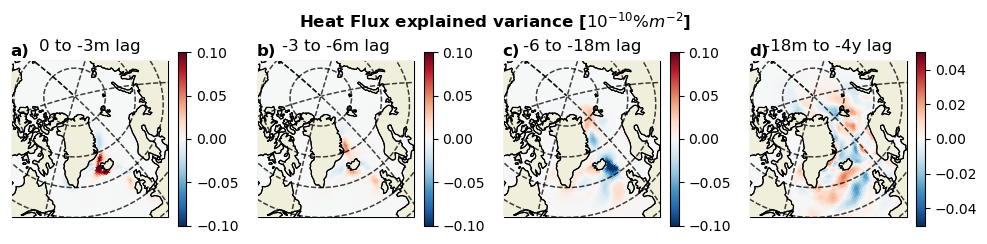

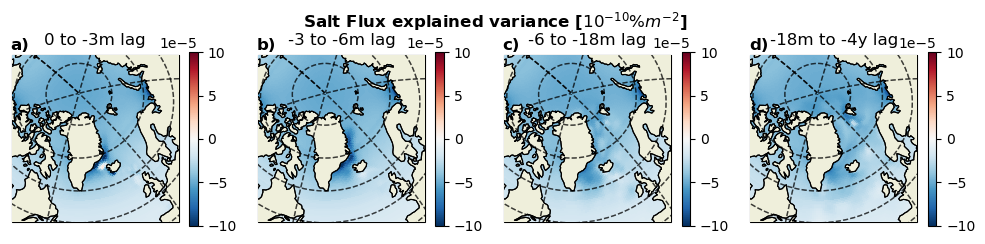

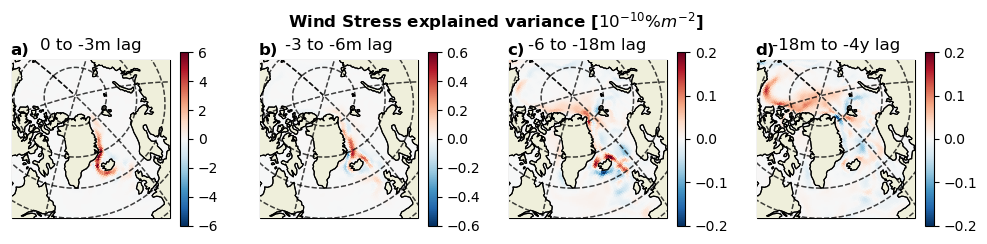

In [21]:
fig_labels=['qnet','empmr','windOCE']
fig_vars=['adxx_qnetXEXFqnet','adxx_empmrXEXFempmr','wind_OCE']
fig_titles=['Heat Flux','Salt Flux','Wind Stress']
for ivar,var in enumerate(fig_vars):
    fig=plt.figure(figsize=[10,6.5])
    pp=1
    for ilag in range(0,4):
        ut.plot_ecco(ecco_grid,ev_2d[var].isel(lag=ilag).mean('eyear')*1e12,subplot_grid=[3,4,pp],
                     cmin=-clims[var][ilag]*1e12,cmax=clims[var][ilag]*1e12,
                     cmap='RdBu_r',**proj_dict,rasterized=True)
        plt.gca().set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        plt.title(lag_labels[ilag],y=1.01)     
        plt.text(-0.01,1.03,f'{chr(97+ilag)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        pp+=1
    plt.suptitle(f'{fig_titles[ivar]} explained variance [$10^{{-10}}\% m^{{-2}}$]',fontsize=12,fontweight='bold',y=0.96)
    plt.tight_layout()
    plt.savefig(f'../plots/fig5_{fig_labels[ivar]}_meanevtotal_bylag_spatial.pdf',bbox_inches='tight')